## Initial Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Import time series data: BitCoin

In [2]:
data = pd.read_csv('Source Data/bitcoinfinal.csv', header=None)
data.columns = ['Month', 'Price']
data = data.set_index('Month')
data.head(12)

,Price
Month,
0,217.4
1,255.7
2,244.3
3,236.1
4,228.7
5,262.9
6,284.5
7,231.4
8,236.5


## Splitting time series into Training and Test Sets

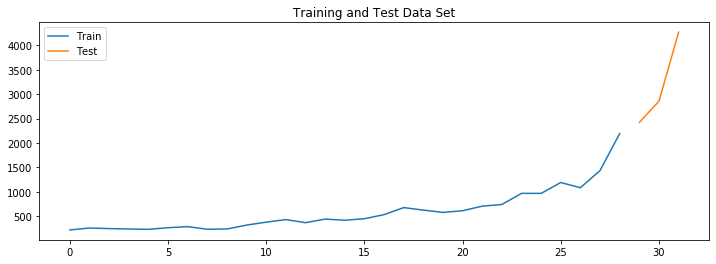

In [3]:
train_len = 29
train = data[0:train_len]
test = data[train_len:]

plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.legend(loc='best')
plt.title('Training and Test Data Set')
plt.show()

### Naive Method

In [4]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = np.round(train['Price'][train_len-1], 2)
y_hat_naive

,Price,naive_forecast
Month,,
29,2420.7,2191.8
30,2856.0,2191.8
31,4268.8,2191.8


## Calculate RMSE and MAPE to evaulate forecast - naive method

In [5]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Price'],y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_naive['naive_forecast'])/test['Price'])*100,2)

results = pd.DataFrame({'Method': 'Naive Method', 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'MAPE', 'RMSE']]

### Simple Average Method

In [6]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = np.round(train['Price'].mean(), 2)
y_hat_avg

,Price,avg_forecast
Month,,
29,2420.7,595.75
30,2856.0,595.75
31,4268.8,595.75


## Calculate RMSE and MAPE to evaulate forecast - simple average method

In [7]:
rmse = np.sqrt(mean_squared_error(test['Price'],y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_avg['avg_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method': 'Naive Method', 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results

,Method,MAPE,RMSE
0,Naive Method,27.12,1265.90
0,Naive Method,80.19,2703.73


## Simple moving average method - with MAPE and RMSE

In [8]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

rmse = np.sqrt(mean_squared_error(test['Price'],y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method': 'Simple moving average method(12 mths)', 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results

,Method,MAPE,RMSE
0,Naive Method,27.12,1265.90
0,Naive Method,80.19,2703.73
0,Simple moving average method(12 mths),67.42,2338.94


In [9]:
y_hat_sma = data.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

rmse = np.sqrt(mean_squared_error(test['Price'],y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method': 'Simple moving average method(6 mths)', 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results

,Method,MAPE,RMSE
0,Naive Method,27.12,1265.90
0,Naive Method,80.19,2703.73
0,Simple moving average method(12 mths),67.42,2338.94
0,Simple moving average method(6 mths),56.61,2035.79


In [10]:
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

rmse = np.sqrt(mean_squared_error(test['Price'],y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method': 'Simple moving average method(3 mths)', 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results

,Method,MAPE,RMSE
0,Naive Method,27.12,1265.90
0,Naive Method,80.19,2703.73
0,Simple moving average method(12 mths),67.42,2338.94
0,Simple moving average method(6 mths),56.61,2035.79
0,Simple moving average method(3 mths),47.81,1794.92


## Simple Exponential Smoothing - with MAPE and RMSE

In [11]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train['Price'])
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(3)

rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_ses['ses_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method': ['Simple exponential smoothing method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results

{'smoothing_level': 1.0, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 217.4, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


,Method,MAPE,RMSE
0,Naive Method,27.12,1265.90
0,Naive Method,80.19,2703.73
0,Simple moving average method(12 mths),67.42,2338.94
0,Simple moving average method(6 mths),56.61,2035.79
0,Simple moving average method(3 mths),47.81,1794.92
0,Simple exponential smoothing method,27.12,1265.90


## Holt's exponential smoothing method with Trend and MAPE and RMSE

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['Price']), trend='additive')
#As the trend is linear, hence, using additive
# The parameter needs an array and np.asarry() converts the dataFrame into an array
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(3)

rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_holt['holt_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method': ['Holt smoothing method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results

{'smoothing_level': 1.0, 'smoothing_slope': 0.4216689816104592, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 203.68630825041842, 'initial_slope': 13.712946700068688, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


,Method,MAPE,RMSE
0,Naive Method,27.12,1265.90
0,Naive Method,80.19,2703.73
0,Simple moving average method(12 mths),67.42,2338.94
0,Simple moving average method(6 mths),56.61,2035.79
0,Simple moving average method(3 mths),47.81,1794.92
0,Simple exponential smoothing method,27.12,1265.90
0,Holt smoothing method,11.01,500.10


## Holt Winter's Additive Method with Trend and Seasonality

In [13]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']), seasonal_periods=3, trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(3)

rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_hwa['hwa_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method': ['Holt Winter\'s additive smoothing method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results

{'smoothing_level': 0.9999999966296118, 'smoothing_slope': 0.4158840347660917, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 559.4835559832011, 'initial_slope': 1.141586351102969, 'initial_seasons': array([-340.14176737, -301.86534664, -319.2290442 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Method,MAPE,RMSE
0,Naive Method,27.12,1265.90
0,Naive Method,80.19,2703.73
0,Simple moving average method(12 mths),67.42,2338.94
0,Simple moving average method(6 mths),56.61,2035.79
0,Simple moving average method(3 mths),47.81,1794.92
0,Simple exponential smoothing method,27.12,1265.90
0,Holt smoothing method,11.01,500.10
0,Holt Winter's additive smoothing method,10.12,515.11


## Holt Winter's Multiplicative Method with Trend and Seasonality

In [14]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']), seasonal_periods=3, trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hwm_forecast'] = model_fit.forecast(3)

rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwm['hwm_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_hwm['hwm_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method': ['Holt Winter\'s multiplicative smoothing method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results, tempResults])
results

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


{'smoothing_level': 1.0, 'smoothing_slope': 0.3159217878524853, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 559.5299998376623, 'initial_slope': 1.1444444468674946, 'initial_seasons': array([0.40269202, 0.46254117, 0.41789625]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


,Method,MAPE,RMSE
0,Naive Method,27.12,1265.90
0,Naive Method,80.19,2703.73
0,Simple moving average method(12 mths),67.42,2338.94
0,Simple moving average method(6 mths),56.61,2035.79
0,Simple moving average method(3 mths),47.81,1794.92
0,Simple exponential smoothing method,27.12,1265.90
0,Holt smoothing method,11.01,500.10
0,Holt Winter's additive smoothing method,10.12,515.11
0,Holt Winter's multiplicative smoothing method,16.57,731.90
